In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from Bio.Seq import Seq

# Dataset insights: Complete dataset

In [25]:
df_dataset = pd.read_csv("../data/dataset/final.csv")

## Number of parent child pairs

In [4]:
df_dataset.count()

parent    9199
child     9199
dtype: int64

## Nucleotide distribution

In [5]:
def count_nucleotide(seq, nucleotide):
    return seq.count(nucleotide)

In [6]:
df_nucleotide_distribution = df_dataset.copy()

df_nucleotide_distribution["count_A"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "A"), axis=1)
df_nucleotide_distribution["count_T"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "T"), axis=1)
df_nucleotide_distribution["count_G"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "G"), axis=1)
df_nucleotide_distribution["count_C"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "C"), axis=1)
df_nucleotide_distribution["count_N"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "N"), axis=1)
df_nucleotide_distribution["count_-"] = df_nucleotide_distribution.apply(lambda row: count_nucleotide(row["parent"], "-"), axis=1)

print(df_nucleotide_distribution.columns)

Index(['parent', 'child', 'count_A', 'count_T', 'count_G', 'count_C',
       'count_N', 'count_-'],
      dtype='object')


(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        3.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 1.300e+01, 1.300e+01,
        2.100e+01, 1.700e+01, 4.000e+0

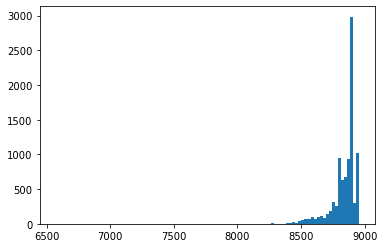

In [7]:
plt.hist(df_nucleotide_distribution["count_A"], bins=100)
#TODO: nice plots of nucleotide distibution

## Differences between parent child sequences

In [93]:
def equal_columns(df_dataset):
    comparison_column = np.where(df_dataset["parent"] == df_dataset["child"], True, False)
    print("From {} parent child pairs {} pairs are completely equal".format(df_dataset["parent"].count(), comparison_column.sum()))

equal_columns(df_dataset)

From 9199 parent child pairs 396 pairs are completely equal


In [94]:
def count_string_differences(seq1, seq2):
    count = sum(1 for a, b in zip(seq1, seq2) if a != b)
    return count

In [10]:
df_dataset["count_different_nucleotides"] = df_dataset.apply(lambda row: count_string_differences(row["parent"], row["child"]), axis=1)

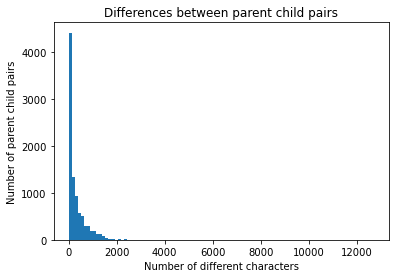

In [11]:
plt.hist(df_dataset["count_different_nucleotides"], bins=100)
plt.xlabel('Number of different characters')
plt.ylabel('Number of parent child pairs')
plt.title('Differences between parent child pairs')
plt.savefig('distributionDifferencesParentChild.png')
plt.show()

## Which genetic loci are often mutated?

In [97]:
def boolean_mask_of_differences(parent, child):
    # mutation = difference -> True
    return np.array(list(parent)) != np.array(list(child))

In [27]:
df_mutation_locis = df_dataset.copy()
df_mutation_locis["mutation_positions"] = df_mutation_locis.apply(lambda row: boolean_mask_of_differences(row["parent"], row["child"]), axis=1)

In [28]:
mutation_positions_matrix = df_mutation_locis["mutation_positions"].to_numpy()

print(mutation_positions_matrix)
print(mutation_positions_matrix.shape)
number_mutations = sum(mutation_positions_matrix)
print(sum(mutation_positions_matrix))
print(len(sum(mutation_positions_matrix)))

[array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False]) ...
 array([False, False, False, ..., False, False, False])
 array([False, False, False, ...,  True,  True, False])
 array([False, False, False, ...,  True,  True, False])]
(9199,)
[  53   85  375 ... 1829 1829    0]
29904


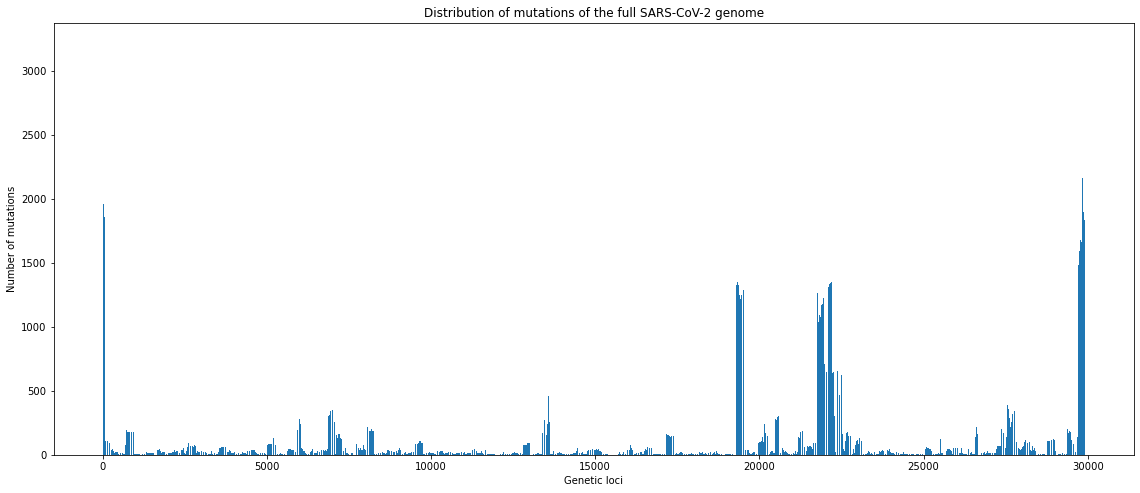

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
number_genetic_loci = range(29904)
ax.bar(number_genetic_loci,number_mutations)
plt.title('Distribution of mutations of the full SARS-CoV-2 genome')
plt.xlabel('Genetic loci')
plt.ylabel('Number of mutations')
plt.savefig('mutatedGeneticLoci.png', bbox_inches = 'tight')
plt.show()

In [ ]:
# TODO: verschiedene Bereiche des Coronavirus verschieden einfärben?

In [38]:
# Where are lots of mutations?
number_mutations[21800:21899]

array([1046, 1047, 1047, 1047, 1043, 1040, 1040, 1064, 1059, 1055, 1063,
       1060, 1067, 1107, 1110, 1123, 1087, 1103, 1112, 1101, 1107, 1122,
       1118, 1124, 1110, 1096, 1103, 1099, 1105, 1093, 1110, 1086, 1091,
       1088, 1098, 1113, 1111, 1107, 1113, 1124, 1120, 1120, 1111, 1120,
       1119, 1256, 1115, 1110, 1111, 1105, 1105, 1118, 1091, 1101, 1120,
       1112, 1113, 1111, 1087, 1076, 1081, 1093, 1092, 1083, 1081, 1089,
       1093, 1114, 1111, 1108, 1111, 1131, 1126, 1124, 1109, 1112, 1111,
       1109, 1096, 1089, 1092, 1106, 1094, 1097, 1085, 1079, 1162, 1163,
       1174, 1168, 1167, 1170, 1175, 1174, 1173, 1184, 1210, 1205, 1192])

In [ ]:
reference_genome = df_dataset["parent"][0]

for m in re.finditer('ATG', reference_genome):
         print('AUG found', m.start(), m.end())

# Dataset insights: Preprocessed dataset

In [39]:
""" Module for custom dataset preprocessing """
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset


class Vocabulary:
    def __init__(self):
        self.itos = {0: "<PAD>", 1: "<SOS>", 2: "<EOS>", 3: "<UNK>"}
        self.stoi = {"<PAD>": 0, "<SOS>": 1, "<EOS>": 2, "<UNK>": 3}

    def __len__(self):
        return len(self.itos)

    @staticmethod
    def tokenizer_codons(sequence):
        codons = []
        for i in range(0, len(sequence), 3):
            amino_acid = sequence[i:i + 3]
            if amino_acid == "---":
                codons.append("<PAD>")
            elif "-" in amino_acid or "N" in amino_acid or len(amino_acid) < 3:
                codons.append("<UNK>")
            else:
                codons.append(amino_acid)
        return codons

    def build_vocabulary(self, sequence_list):
        index = 4
        for sequence in sequence_list:
            for codon in self.tokenizer_codons(sequence):
                if codon not in self.stoi:
                    self.stoi[codon] = index
                    self.itos[index] = codon
                    index += 1

    def numericalize(self, sequence):
        return [self.stoi[token] for token in self.tokenizer_codons(sequence)]


class CustomGISAIDDataset(Dataset):
    def __init__(self, dataset_file, test_set_size=0.05, train=True, strain_begin=21800, strain_end=21899):   #101 - 2000
        # Load the data and restrict to RNA strains
        print("Loading data and cutting to strains...")
        self.df_dataset = pd.read_csv(dataset_file)
        self.df_dataset["parent"] = self.df_dataset["parent"].str[strain_begin:strain_end]
        self.df_dataset["child"] = self.df_dataset["child"].str[strain_begin:strain_end]

        self.strain_begin = strain_begin
        self.strain_end = strain_end
        self.train = train

        # Initialize vocabulary and build vocabulary
        print("Building vocabulary...")
        self.parent_vocab = Vocabulary()
        self.parent_vocab.build_vocabulary(self.df_dataset["parent"].tolist())
        self.child_vocab = Vocabulary()
        self.child_vocab.build_vocabulary(self.df_dataset["child"].tolist())

        # Initialize vocabulary and build vocabulary
        print("Train test split...")
        self.df_train, self.df_test = train_test_split(self.df_dataset, test_size=test_set_size)
        chosen_dataset = self.df_train if train else self.df_test
        self.parent = chosen_dataset["parent"]
        self.child = chosen_dataset["child"]

        # Numericalize sequences
        print("Numericalize sequences...")
        self.parent = self.parent.apply(lambda sequence: [self.parent_vocab.stoi["<SOS>"]] + self.parent_vocab.numericalize(sequence) + [self.parent_vocab.stoi["<EOS>"]])
        self.child = self.child.apply(lambda sequence: [self.child_vocab.stoi["<SOS>"]] + self.child_vocab.numericalize(sequence) + [self.child_vocab.stoi["<EOS>"]])

    def __getitem__(self, index):
        return torch.tensor(self.parent.iloc[index]), torch.tensor(self.child.iloc[index])

    def __len__(self):
        return len(self.df_train) if self.train else len(self.df_test)


def get_loader(dataset_file, test_set_size=0.05, batch_size=32, train=True, num_workers=4):
    dataset = CustomGISAIDDataset(dataset_file, test_set_size=test_set_size, train=train)
    return dataset, DataLoader(
        dataset=dataset,
        batch_size=batch_size,
        num_workers=num_workers,
        shuffle=True,
        pin_memory=True,
    )

In [40]:
train_dataset, data_loader = get_loader("/home/st/AML-covid-project/src/data/dataset/final.csv", test_set_size=0.05, batch_size=32, train=True)

Loading data and cutting to strains...
Building vocabulary...
Train test split...
Numericalize sequences...


In [70]:
train_dataset_as_list = list(torch.utils.data.DataLoader(train_dataset, num_workers=0))

In [87]:
data = []
for pair in train_dataset_as_list:
    data.append([pair[0].tolist()[0], pair[1].tolist()[0]])

In [90]:
df_preprocessed = pd.DataFrame(data, columns=["parent", "child"])

In [91]:
df_preprocessed

,parent,child
0,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
1,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
2,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
3,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
4,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
...,...,...
8734,"[1, 4, 5, 6, 7, 8, 9, 10, 3, 3, 3, 3, 3, 3, 3,...","[1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ..."
8735,"[1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
8736,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."
8737,"[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ...","[1, 4, 5, 6, 7, 8, 9, 10, 11, 11, 12, 13, 14, ..."


## Differences between parent child sequences

In [95]:
equal_columns(df_preprocessed)
df_preprocessed["count_different_nucleotides"] = df_preprocessed.apply(lambda row: count_string_differences(row["parent"], row["child"]), axis=1)

From 8739 parent child pairs 6946 pairs are completely equal


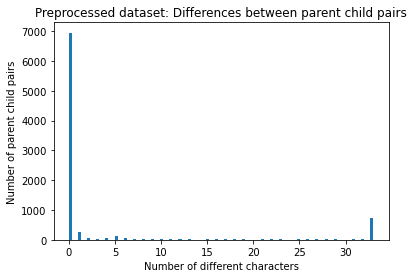

In [96]:
plt.hist(df_preprocessed["count_different_nucleotides"], bins=100)
plt.xlabel('Number of different characters')
plt.ylabel('Number of parent child pairs')
plt.title('Preprocessed dataset: Differences between parent child pairs')
plt.savefig('preprocessedDistributionDifferencesParentChild.png')
plt.show()

## Which genetic loci are often mutated?

In [98]:
df_mutation_locis_pre = df_preprocessed.copy()
df_mutation_locis_pre["mutation_positions"] = df_mutation_locis_pre.apply(lambda row: boolean_mask_of_differences(row["parent"], row["child"]), axis=1)

In [99]:
mutation_positions_matrix_pre = df_mutation_locis_pre["mutation_positions"].to_numpy()

print(mutation_positions_matrix_pre)
print(mutation_positions_matrix_pre.shape)
number_mutations_pre = sum(mutation_positions_matrix_pre)
print(sum(number_mutations_pre))
print(len(sum(mutation_positions_matrix_pre)))

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False])
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False])
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False])       ...
 array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,

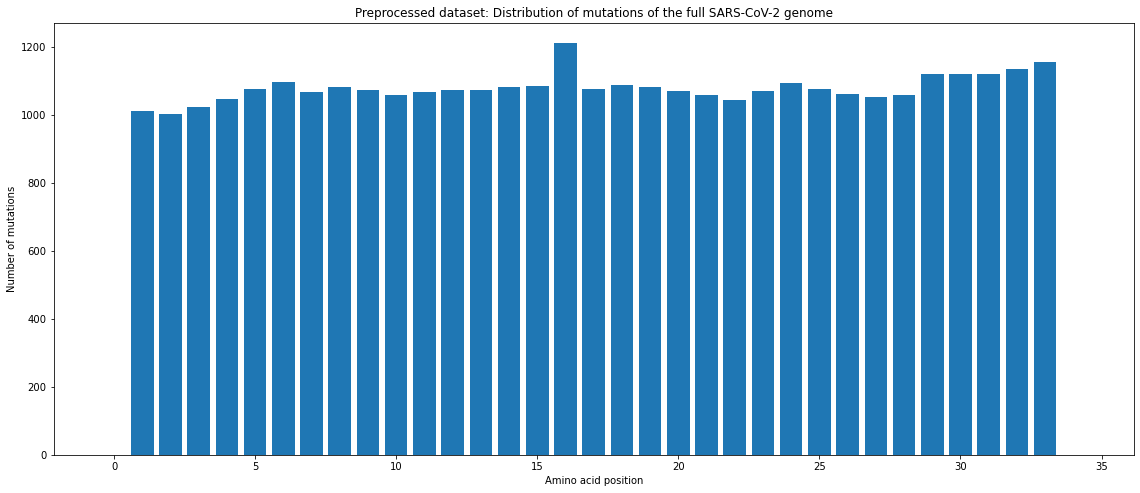

In [101]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15, 6))
ax = fig.add_axes([0,0,1,1])
number_amino_acids = range(35)
ax.bar(number_amino_acids,number_mutations_pre)
plt.title('Preprocessed dataset: Distribution of mutations of the full SARS-CoV-2 genome')
plt.xlabel('Amino acid position')
plt.ylabel('Number of mutations')
plt.savefig('preprocessedMutatedGeneticLoci.png', bbox_inches = 'tight')
plt.show()